In [ ]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Importing all the important libraries for the given task**

In [ ]:
car_data = pd.read_csv('/content/Used Car Dataset.csv')


Firstly,we should read the given dataset

**Displaying the first 5 values in dataset**

In [ ]:
car_data.head()

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


**Displaying the last 5 values in dataset**

In [ ]:
car_data.tail()

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
1548,1548,2020 Hyundai Creta SX Opt Diesel AT BSVI,Aug-20,Comprehensive,Diesel,5,35000,First Owner,Automatic,2020,1493.00,11345.0,11345.0,250.0,17.41
1549,1549,2022 Renault KWID 1.0 RXL Opt BSVI,2022,Third Party insurance,Petrol,5,10000,999 cc,2022,Power Steering,999.00,6706.0,6706.0,91.0,3.98
1550,1550,2017 Honda WR-V i-VTEC S,Jun-17,Comprehensive,Petrol,5,49000,First Owner,Manual,2017,17.50,1199.0,1199.0,887.0,5.85
1551,1551,2018 Volkswagen Polo 1.0 MPI Comfortline,May-18,Comprehensive,Petrol,5,40000,Second Owner,Manual,2018,18.78,999.0,999.0,75.0,4.75
1552,1552,2018 Maruti Swift Dzire VXI,May-18,Comprehensive,Petrol,5,34756,First Owner,Manual,2018,20.85,1197.0,1197.0,8314.0,6.10


**Displaying the information about the dataset(like datatype,rows,columns**

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1553 non-null   int64  
 1   car_name            1553 non-null   object 
 2   registration_year   1553 non-null   object 
 3   insurance_validity  1553 non-null   object 
 4   fuel_type           1553 non-null   object 
 5   seats               1553 non-null   int64  
 6   kms_driven          1553 non-null   int64  
 7   ownsership          1553 non-null   object 
 8   transmission        1553 non-null   object 
 9   manufacturing_year  1553 non-null   object 
 10  mileage(kmpl)       1550 non-null   float64
 11  engine(cc)          1550 non-null   float64
 12  max_power(bhp)      1550 non-null   float64
 13  torque(Nm)          1549 non-null   float64
 14  price(in lakhs)     1553 non-null   float64
dtypes: float64(5), int64(3), object(7)
memory usage: 182.1+

Check whether is there any null values in the given dataset

In [ ]:
car_data.isnull().sum()

Unnamed: 0            0
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         3
engine(cc)            3
max_power(bhp)        3
torque(Nm)            4
price(in lakhs)       0
dtype: int64

In [ ]:
# Remove rows with null values only in specific columns
columns_with_nulls = ['mileage(kmpl)', 'engine(cc)', 'max_power(bhp)', 'torque(Nm)']
car_data= car_data.dropna(subset=columns_with_nulls)

# Reset the index
car_data= car_data.reset_index(drop=True)

Removing the null values in the above columns such as mileage,engine,torque.

**After removing the null values**

In [ ]:
car_data.isnull().sum()

Unnamed: 0            0
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         0
engine(cc)            0
max_power(bhp)        0
torque(Nm)            0
price(in lakhs)       0
dtype: int64

Describing the given dataset like mean,standard deviation,minimum values,1st quartile,2nd quartile,3rd quartile and maximum values.

In [ ]:
car_data.describe()

,Unnamed: 0,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
count,1549.000000,1549.00000,1549.000000,1549.000000,1.549000e+03,1.549000e+03,1.549000e+03,1549.000000
mean,776.650097,91.70368,52871.165268,237.067966,1.473422e+10,1.473422e+10,1.423989e+04,166.519258
std,448.847012,2406.52323,40103.619123,586.127342,2.187245e+11,2.187245e+11,9.666241e+04,3483.338542
min,0.000000,4.00000,620.000000,7.810000,1.700000e+01,1.700000e+01,5.000000e+00,1.000000
25%,387.000000,5.00000,30000.000000,16.340000,1.197000e+03,1.197000e+03,4.000000e+02,4.700000
50%,778.000000,5.00000,49000.000000,18.900000,1.462000e+03,1.462000e+03,1.173000e+03,7.140000
75%,1165.000000,5.00000,70000.000000,22.000000,1.995000e+03,1.995000e+03,8.850000e+03,17.000000
max,1552.000000,67000.00000,810000.000000,3996.000000,3.260000e+12,3.260000e+12,1.464800e+06,95000.000000


To check what are the columns in the given dataset

In [ ]:
car_data.columns

Index(['Unnamed: 0', 'car_name', 'registration_year', 'insurance_validity',
       'fuel_type', 'seats', 'kms_driven', 'ownsership', 'transmission',
       'manufacturing_year', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)', 'price(in lakhs)'],
      dtype='object')

In [ ]:
print(car_data['fuel_type'].value_counts())

Petrol     1009
Diesel      516
CNG          22
5 Seats       2
Name: fuel_type, dtype: int64


To know the types of fuel in given dataset.

<Axes: xlabel='fuel_type', ylabel='count'>

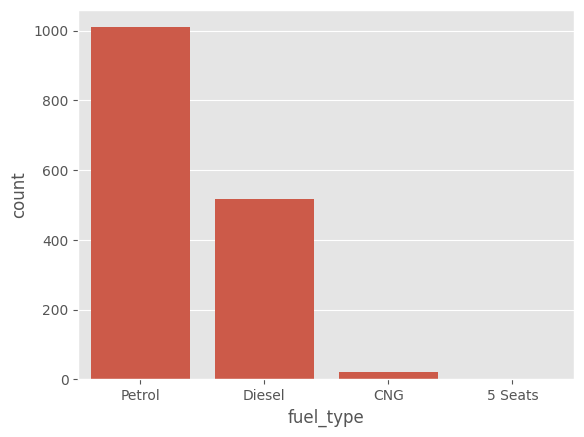

In [ ]:
import seaborn as sns
sns.countplot(car_data, x="fuel_type")

From the above graph,we can clearly say that petrol type is more compared to other types.

Text(0.5, 1.0, 'fuel_type')

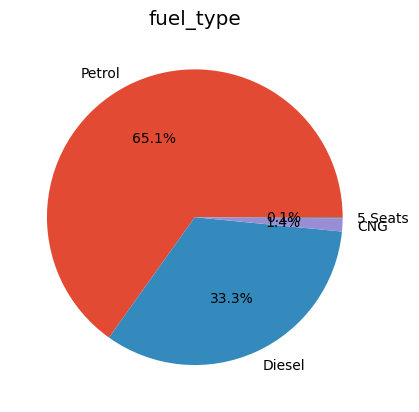

In [ ]:
# Pie chart using matplotlib
import matplotlib.pyplot as plt
dependents = car_data['fuel_type'].value_counts()
plt.pie(dependents.values, labels=dependents.index, autopct='%1.1f%%')
plt.title("fuel_type")

Different types of fuel and from that we can clearly say that CNG is very less compared to other fuel_types.

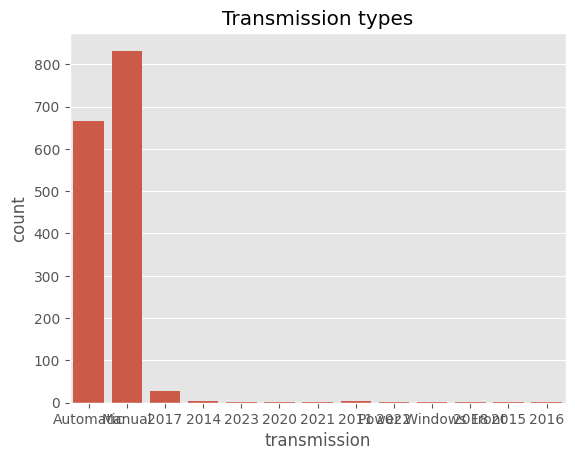

In [ ]:
sns.countplot(x='transmission', data=car_data)
plt.title('Transmission types')
plt.show()

**From above we can clearly say that Automatic cars are more among all the other cars.**

<Axes: >

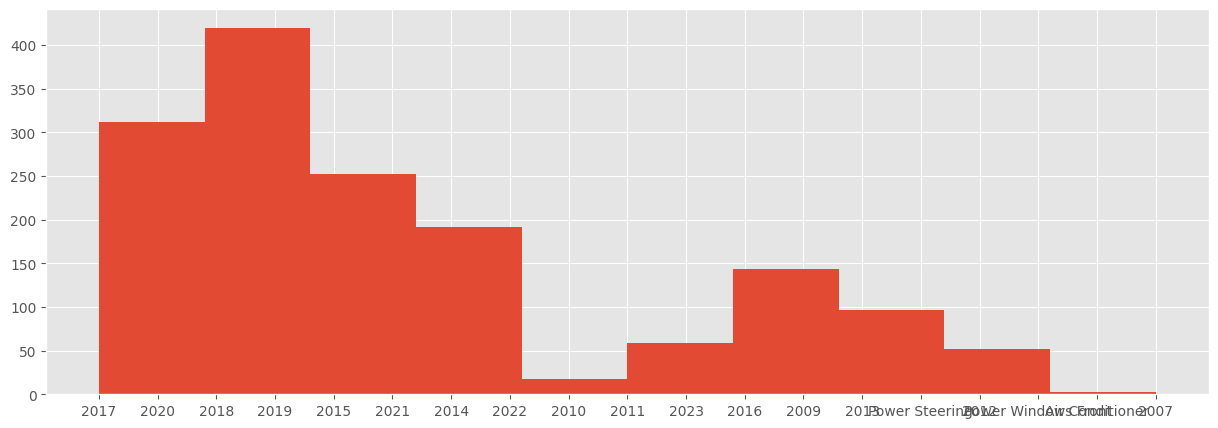

In [ ]:
fig = plt.figure(figsize=(15,5))
car_data['manufacturing_year'].hist()

**From the above we can clearly say that, 2019 is the highest manufacturing year.**

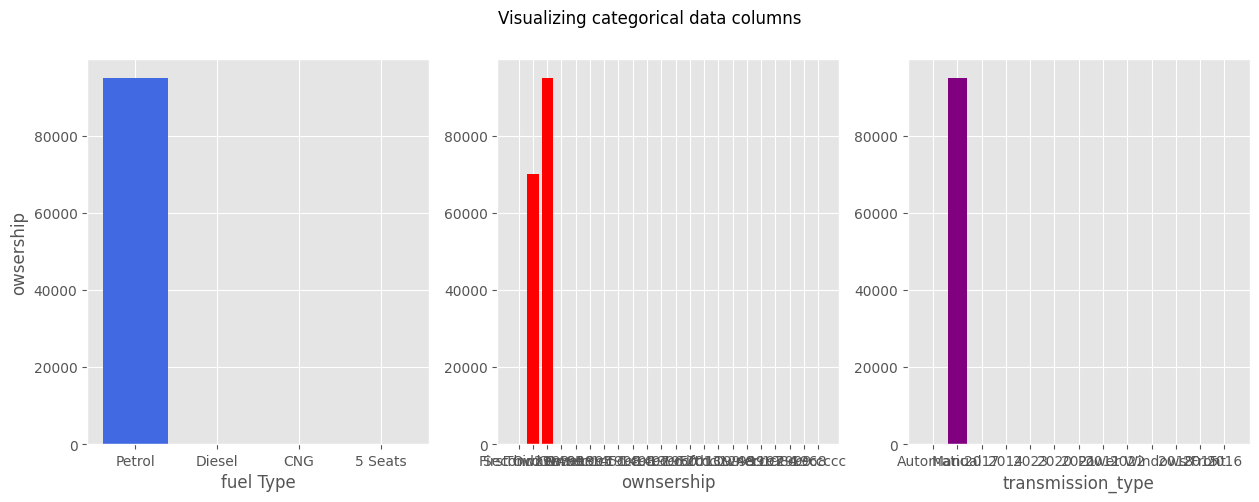

In [ ]:
fuel_type = car_data['fuel_type']
ownsership = car_data['ownsership']
transmission_type = car_data['transmission']
price = car_data['price(in lakhs)']
from matplotlib import style

style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,3,1)
plt.bar(fuel_type,price, color='royalblue')
plt.xlabel("fuel Type")
plt.ylabel("owsership")
plt.subplot(1,3,2)
plt.bar(ownsership,price, color='red')
plt.xlabel("ownsership")
plt.subplot(1,3,3)
plt.bar(transmission_type, price, color='purple')
plt.xlabel('transmission_type')
plt.show()

**MANUAL ENCODING:**

In [ ]:
import pandas as pd
# Manual encoding of fuel types
fuel_type_encoding = {'Petrol': 1, 'Diesel': 2, 'CNG': 3,'5 Seats':4}
car_data['fuel_type'] = car_data['fuel_type'].replace(fuel_type_encoding)

manufacturing_year_encoding = {'Power Steering':0}
car_data['manufacturing_year']=car_data['manufacturing_year'].replace(manufacturing_year_encoding)
# Display the updated DataFrame
print(car_data)

      Unnamed: 0                                           car_name  \
0              0                    2017 Mercedes-Benz S-Class S400   
1              1  2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI   
2              2                       2018 BMW X1 sDrive 20d xLine   
3              3                           2019 Kia Seltos GTX Plus   
4              4                    2019 Skoda Superb LK 1.8 TSI AT   
...          ...                                                ...   
1544        1548           2020 Hyundai Creta SX Opt Diesel AT BSVI   
1545        1549                 2022 Renault KWID 1.0 RXL Opt BSVI   
1546        1550                           2017 Honda WR-V i-VTEC S   
1547        1551           2018 Volkswagen Polo 1.0 MPI Comfortline   
1548        1552                        2018 Maruti Swift Dzire VXI   

     registration_year     insurance_validity  fuel_type  seats  kms_driven  \
0               Jul-17          Comprehensive          1      5     

In [ ]:
car_data.head()

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,1,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,1,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,2,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,1,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,1,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


**Removing the non-numerical columns in the given dataset.**

In [ ]:
import pandas as pd

non_numeric_columns = ['insurance_validity', 'ownsership', 'transmission','registration_year','manufacturing_year']

car_data = car_data.drop(non_numeric_columns, axis=1)
print(car_data)


      Unnamed: 0                                           car_name  \
0              0                    2017 Mercedes-Benz S-Class S400   
1              1  2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI   
2              2                       2018 BMW X1 sDrive 20d xLine   
3              3                           2019 Kia Seltos GTX Plus   
4              4                    2019 Skoda Superb LK 1.8 TSI AT   
...          ...                                                ...   
1544        1548           2020 Hyundai Creta SX Opt Diesel AT BSVI   
1545        1549                 2022 Renault KWID 1.0 RXL Opt BSVI   
1546        1550                           2017 Honda WR-V i-VTEC S   
1547        1551           2018 Volkswagen Polo 1.0 MPI Comfortline   
1548        1552                        2018 Maruti Swift Dzire VXI   

      fuel_type  seats  kms_driven  mileage(kmpl)  engine(cc)  max_power(bhp)  \
0             1      5       56000           7.81      2996.0     

In [ ]:
car_data.head()

,Unnamed: 0,car_name,fuel_type,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,1,5,56000,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,1,5,30615,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,2,5,24000,20.68,1995.0,1995.0,188.0,23.75
3,3,2019 Kia Seltos GTX Plus,1,5,18378,16.50,1353.0,1353.0,13808.0,13.56
4,4,2019 Skoda Superb LK 1.8 TSI AT,1,5,44900,14.67,1798.0,1798.0,17746.0,24.00


<ipython-input-345-c7b23842a19e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_data.corr(), annot=True)


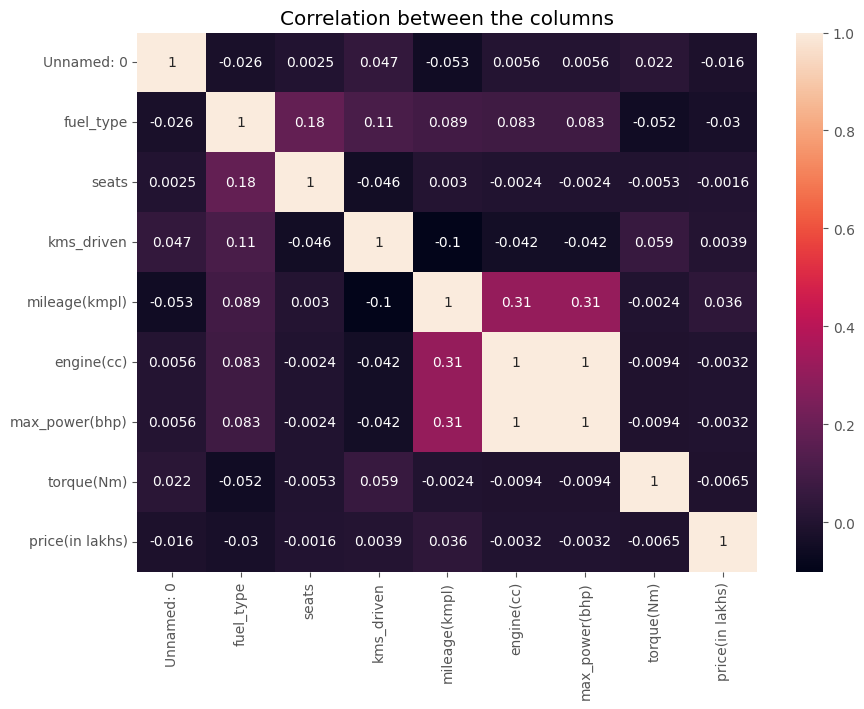

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(car_data.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

**Splitting the data and Target**

In [ ]:
X = car_data.drop(['car_name','price(in lakhs)'],axis=1)
y = car_data['price(in lakhs)']
print(X)
print(y)

      Unnamed: 0  fuel_type  seats  kms_driven  mileage(kmpl)  engine(cc)  \
0              0          1      5       56000           7.81      2996.0   
1              1          1      5       30615          17.40       999.0   
2              2          2      5       24000          20.68      1995.0   
3              3          1      5       18378          16.50      1353.0   
4              4          1      5       44900          14.67      1798.0   
...          ...        ...    ...         ...            ...         ...   
1544        1548          2      5       35000        1493.00     11345.0   
1545        1549          1      5       10000         999.00      6706.0   
1546        1550          1      5       49000          17.50      1199.0   
1547        1551          1      5       40000          18.78       999.0   
1548        1552          1      5       34756          20.85      1197.0   

      max_power(bhp)  torque(Nm)  
0             2996.0       333.0  
1    

**Shape of the data**

In [ ]:
print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)

Shape of X is:  (1549, 8)
Shape of y is:  (1549,)


**Splitting Training and Test data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

**Model Training**

**1.Linear Regression**

In [ ]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,y_train)

LinearRegression()

**Model Evaluation**

In [ ]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.0014066242366728154


A value close to zero (0.0014) suggests that the independent variables in our regression model are not effective in explaining the variability in the dependent variable. This could mean that the model is **not a good fit for the data**, and the chosen independent variables are not strongly related to the dependent variable.

**Visualize the actual prices and Predicted prices**

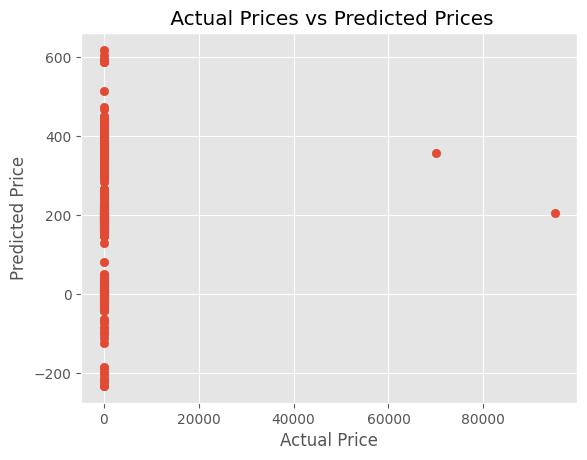

In [ ]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Testing data
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.004320321726065446


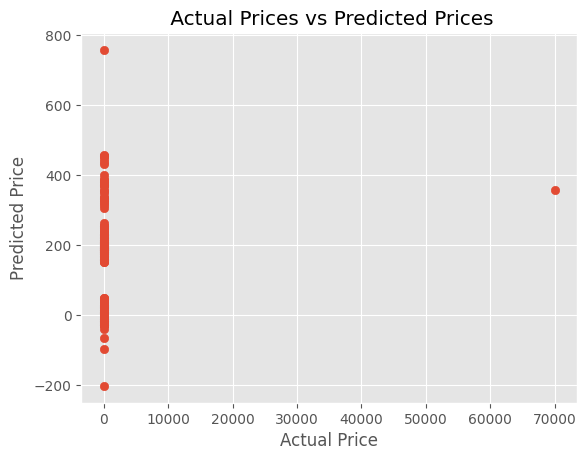

In [ ]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

**2.Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
# loading the linear regression model
lass_reg_model = Lasso()

In [ ]:
lass_reg_model.fit(X_train,y_train)

Lasso()

In [ ]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [ ]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.0014062771470628732
